In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('fifa_modified1.csv')
df.drop(columns=['sofifa_id','nationality','club','player_positions',
                         'preferred_foot','work_rate','body_type','real_face'],inplace=True)
    
names = df.short_name.tolist()
df.drop(columns=['short_name'],inplace=True)

In [6]:
x= df.values
scaler = preprocessing.MinMaxScaler()    
x_scaled = scaler.fit_transform(x)
X_norm= pd.DataFrame(x_scaled)

In [9]:
pca = PCA(n_components=2)
reduced = pd.DataFrame(pca.fit_transform(X_norm))

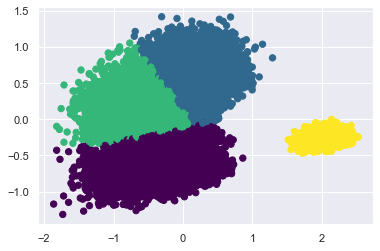

In [20]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=4, covariance_type='full')
gmm = model.fit(reduced)
labels = gmm.predict(reduced)
reduced.head()
plt.scatter(reduced.loc[:, 0], reduced.loc[:, 1], c=labels, s=40, cmap='viridis')
# print(labels)

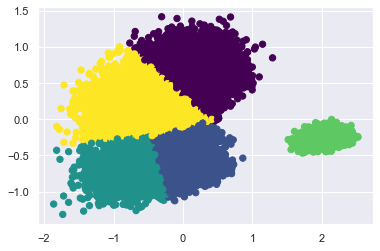

In [22]:
# for 5 clusters
model = mixture.GaussianMixture(n_components=5, covariance_type='full')
gmm = model.fit(reduced)
labels = gmm.predict(reduced)
reduced.head()
plt.scatter(reduced.loc[:, 0], reduced.loc[:, 1], c=labels, s=40, cmap='viridis')

In [23]:
# result is almost similar to hierarchical clustering

Choosing the covariance type
If you look at the details of the preceding fits, you will see that the covariance_type option was set differently within each. This hyperparameter controls the degrees of freedom in the shape of each cluster; it is essential to set this carefully for any given problem. The default is covariance_type="diag", which means that the size of the cluster along each dimension can be set independently, with the resulting ellipse constrained to align with the axes. A slightly simpler and faster model is covariance_type="spherical", which constrains the shape of the cluster such that all dimensions are equal. The resulting clustering will have similar characteristics to that of k-means, though it is not entirely equivalent. A more complicated and computationally expensive model (especially as the number of dimensions grows) is to use covariance_type="full", which allows each cluster to be modeled as an ellipse with arbitrary orientation.

In [21]:
# But how do we know the number of components

How many components?
The fact that GMM is a generative model gives us a natural means of determining the optimal number of components for a given dataset. A generative model is inherently a probability distribution for the dataset, and so we can simply evaluate the likelihood of the data under the model, using cross-validation to avoid over-fitting. Another means of correcting for over-fitting is to adjust the model likelihoods using some analytic criterion such as the Akaike information criterion (AIC) or the Bayesian information criterion (BIC). Scikit-Learn's GMM estimator actually includes built-in methods that compute both of these, and so it is very easy to operate on this approach.

Let's look at the AIC and BIC as a function as the number of GMM components for our moon dataset:

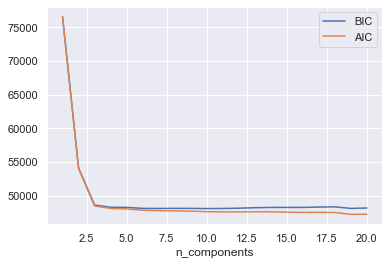

In [25]:
n_components = np.arange(1, 21)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(reduced)
          for n in n_components]

plt.plot(n_components, [m.bic(reduced) for m in models], label='BIC')
plt.plot(n_components, [m.aic(reduced) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

Notice the important point: this choice of number of components measures how well GMM works as a density estimator, not how well it works as a clustering algorithm.

In [26]:
# according to result 2 is the best number of clusters
# some other are 7,11,18,19

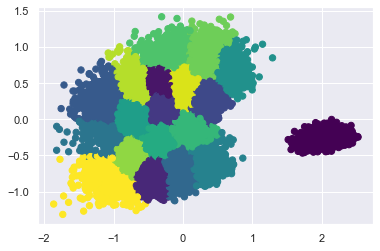

In [27]:
# for 19 clusters
model = mixture.GaussianMixture(n_components=19, covariance_type='full')
gmm = model.fit(reduced)
labels = gmm.predict(reduced)
reduced.head()
plt.scatter(reduced.loc[:, 0], reduced.loc[:, 1], c=labels, s=40, cmap='viridis')